# PHREEQC Model Plotting
This notebook will plot your PHREEQC modeling result. You will need to the selected output file from PHREEQC. 


### Start this notebook by uploading your selected output file from PHREEQC.
* Replace `selected_example.sel` with the filename of your selected output from PHREEQC

In [13]:
selectedoutput = "cdbact_test.sel"

In [14]:
# import the pandas module to store data in a dataframe
import pandas as pd
import os

# load the selected output into a dataframe and specify that the data are separated by tabs
mod = pd.read_csv(selectedoutput, sep="\t")
# get rid of the first row data (they are not needed for this analysis)
mod.drop([0], inplace=True)
mod.drop([1], inplace=True)
# drop the last column (it is not empty)
mod.drop(mod.columns[-1], axis=1, inplace=True)
# get rid of extraneous whitespaces in the column headers
mod = mod.rename(columns=lambda x: x.strip())
# sort the data in acending order based on pH
mod.sort_values("pH", inplace=True)

# Double check that the selected output looks correct

In [15]:
mod

,pH,m_BactaOCd+,m_BactbOCd+,m_BactcOCd+,m_BactdOCd+
3,3.03423,1.249300e-09,3.574400e-11,1.613400e-11,1.120600e-12
4,3.03423,1.249300e-09,3.574400e-11,1.613400e-11,1.120600e-12
5,3.03423,1.249300e-09,3.574400e-11,1.613400e-11,1.120600e-12
6,3.50000,1.950000e-09,1.000900e-10,4.698600e-11,3.265400e-12
7,4.00000,2.434100e-09,2.797000e-10,1.478800e-10,1.029600e-11
8,4.50000,2.635800e-09,6.483200e-10,4.633900e-10,3.245000e-11
9,5.00000,2.694500e-09,1.110000e-09,1.430900e-09,1.020200e-10
10,5.50000,2.686000e-09,1.421000e-09,4.230200e-09,3.186700e-10
11,6.00000,2.619000e-09,1.524100e-09,1.111700e-08,9.790800e-10
12,6.50000,2.487000e-09,1.494800e-09,2.285800e-08,2.930800e-09


### We need to sum Cd adsorbed onto each surface site at each pH value in order to calculate total Cd adsorbed onto the bacteria and complexed by the humic / fulvic acids.

In [16]:
# Total Cd used in the modeling in molality
Cdm = 2.41e-7
# sum the Cd adsorbed on the strong and weak surface sites at each pH value
modcdads = mod["m_BactaOCd+"] + mod["m_BactbOCd+"] + mod["m_BactcOCd+"] + mod["m_BactdOCd+"]

# calculate total Cd adsorbed as a percent
modsper = (modcdads / Cdm) * 100

# calcuate Cd adsorbed on the strong and weak site as percents
sitea = mod["m_BactaOCd+"] / Cdm * 100
siteb = mod["m_BactbOCd+"] / Cdm * 100
sitec = mod["m_BactcOCd+"] / Cdm * 100
sited = mod["m_BactdOCd+"] / Cdm * 100

### Bacteria model result plots

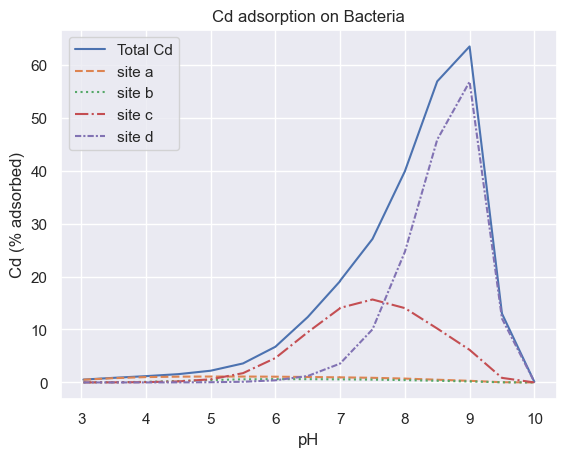

In [17]:
# Import a modules for the plotting 
import matplotlib.pyplot as plt

# The seaborn module will make the plots look nicer
import seaborn as sns

sns.set_theme()

plt.figure()
# Plot the cumulative model and individual site adsorption
plt.plot(mod["pH"], modsper, label="Total Cd", linestyle="-")
plt.plot(mod["pH"], sitea, label="site a", linestyle="--")
plt.plot(mod["pH"], siteb, label="site b", linestyle=":")
plt.plot(mod["pH"], sitec, label="site c", linestyle="-.")
plt.plot(mod["pH"], sited, label="site d", linestyle=(0, (3, 1, 1, 1)))
# Label the x and y axes
plt.xlabel("pH")
plt.ylabel("Cd (% adsorbed)")
plt.title("Cd adsorption on Bacteria")
# Add a legend to the plot
plt.legend()

# Save and download the plot as png file
plt.savefig("percentCd_bact_mod.png")

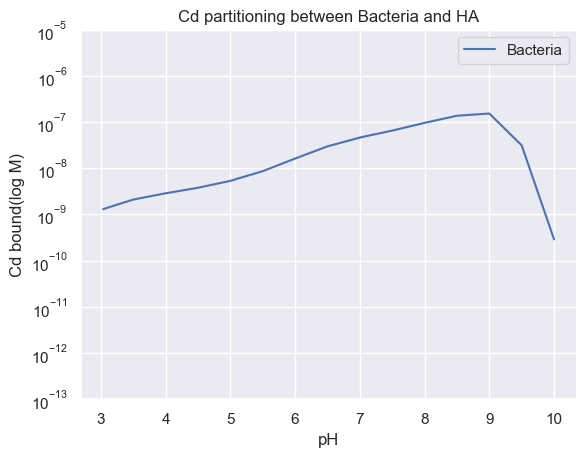

In [18]:
# Create a new figure
plt.figure()
# I'll plot the data as points and the model as a line
plt.plot(mod["pH"], modcdads, label="Bacteria")

# Label the x and y axes
plt.xlabel("pH")
plt.ylabel("Cd bound(log M)")
plt.title("Cd partitioning between Bacteria and HA")
# Y axis in log scale
plt.yscale("log")
# y axis limits
plt.ylim(1e-13, 1e-5)
# Add a legend to the plot
plt.legend()
plt.savefig("logCd_bact_mod.png")